# Analyzing Machine Learning Algorithms For The Prediction Of Malignant Breast Cancer

Here we use the sklearn dataset 'breast cancer' which described according to features like radius or textures if the tumor is benign or malignant. We compare several sklearn algorithms and check which one fits best for our data. We use the simple train_test_split module which uses a set amount of the data to train the algorithm (20% in our case) and uses the rest for testing its efficiency (80% test data).

Initially, we import all necessary Python libraries including matplotlib for the visual demonstration. In this example we compare following algorihtms:

- K-Nearest-Neighbor (kNN)
- Random Forest
- Logistic Regression



In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


The dataset 'breast cancer' is in a sklearn bunch format, which works similar like a python dictionary with a key and value. Still it is easier to work with a pandas dataframe so we extract information of the sklearn library and convert it into a dataframe. For that matter we define 'X' as features amd y as labels. In the case of the breast cancer dataset the features X represent numbers which describe the properties of the tumour like radius, whereas 'y' includes classes either malignant = 0, or benign = 1.
We start with converting X values in a dataframe including the column names. Then we add another column for the y values 0 or 1.


In [15]:
breast_cancer = load_breast_cancer()
print(f"The breast_cancer dataset is in a {type(breast_cancer)} format.")
X = breast_cancer.data
y = breast_cancer.target

df_breast_cancer = pd.DataFrame(X, columns = breast_cancer.feature_names)
df_breast_cancer["target"] = y
print(df_breast_cancer.head(3))

print(f"Class 0: {breast_cancer.target_names[0]}")
print(f"Class 1: {breast_cancer.target_names[1]}")


The breast_cancer dataset is in a <class 'sklearn.utils._bunch.Bunch'> format.
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   
2                 0.05999  ...          25.53            152.5      1709.0   

  

By using the pandas .info() command we know that features are numbers only, so we do not need to transform strings into values. Im case there are strings we can use Tfidfvectorizer to transform them into numbers.

In [16]:
print(df_breast_cancer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Now we use the train_test_split library to split the dataset into a 20% training set (test_size = 0.2) and a 80% test set. By setting the random state to 42 - the answer of all questions ;) - we make sure that the randomily selected 20% stay the same when we restart the code.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

For distance-based algorithms like kNN it is crucial to scale your data. Otherwise larger values will be interpreted as 'more important'. For scaling we use StandardScaler and scale the X training and test data separetaly. Importantly, we fit using only the training data otherwise we would leak information of the test data which could result in overfitting.


In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Let's train our algorithms with the training data! To check the efficiency of each algorithm we predict the classes (y) with the features (X), and then calculate the accurancy by comparing the predicted values to the 'real' values of the data set. Additionally, we output a classification report for each algorithm.

The classification report outputs following values:

- precision: TP/(TP+FP) the amount of true positives in % high values indicate less false positives.
 - recall: TP/(TP+FN) the amount of true positives in % high values indicate less falls negatives
- F1 score: 2x((P*R)/(P+R)) harmonic mean of precision P and recall R
- support: how many examples per class, informative value not for validation of the algorithm

In [19]:
# kNN

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_pred_knn, y_test)
print(f"KNN algorithm:\n{"-"*20}\nAccuracy: {acc_knn:.2f}")
print(f"classification report:\n{classification_report(y_pred_knn, y_test, target_names=breast_cancer.target_names)}")

KNN algorithm:
--------------------
Accuracy: 0.95
classification report:
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [20]:
# Random Forest
RF = RandomForestClassifier(max_depth=5, n_estimators = 300, random_state=42)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

acc_RF = accuracy_score(y_pred_RF, y_test)
print(f"Random Forest algorithm:\n{"-"*20}\nAccuracy: {acc_RF:.2f}")
print(f"classification report:\n{classification_report(y_pred_RF, y_test, target_names=breast_cancer.target_names)}")


Random Forest algorithm:
--------------------
Accuracy: 0.96
classification report:
              precision    recall  f1-score   support

   malignant       0.93      0.98      0.95        41
      benign       0.99      0.96      0.97        73

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [21]:
# Logistic Regresssion

LR = LogisticRegression(max_iter=100, random_state=42)
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

acc_LR = accuracy_score(y_pred_LR, y_test)
print(f"Logistic Regression algorithm:\n{"-"*20}\nAccuracy: {acc_LR:.2f}")
print(f"classification report:\n{classification_report(y_pred_LR, y_test, target_names=breast_cancer.target_names)}")


Logistic Regression algorithm:
--------------------
Accuracy: 0.97
classification report:
              precision    recall  f1-score   support

   malignant       0.95      0.98      0.96        42
      benign       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Let's compare the accurancy of each algorithm using matplot. The outcome shows that kNN does not work as good as Random Forest and Logistic Regression algorithms for more complex data.

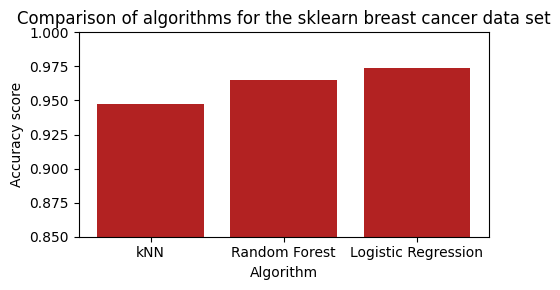

In [22]:
methods = ["kNN", "Random Forest", "Logistic Regression"]
acc_scores = [acc_knn, acc_RF, acc_LR]
plt.figure(figsize=(5,3))
plt.bar(methods, acc_scores, color = "firebrick")
plt.title ("Comparison of algorithms for the sklearn breast cancer data set")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy score")
plt.ylim(0.85,1)
plt.tight_layout()
plt.show()

Let's check for two selected features ho good the chosen algorithms work in correctly predicting dangerous tumours. For that matter we need to features that do not correlate strongly. So let's draw a heatmap! The blue colors indicate less correlations, so we choose the features radius (0) and symmetry (8) for our next plots.

<function matplotlib.pyplot.show(close=None, block=None)>

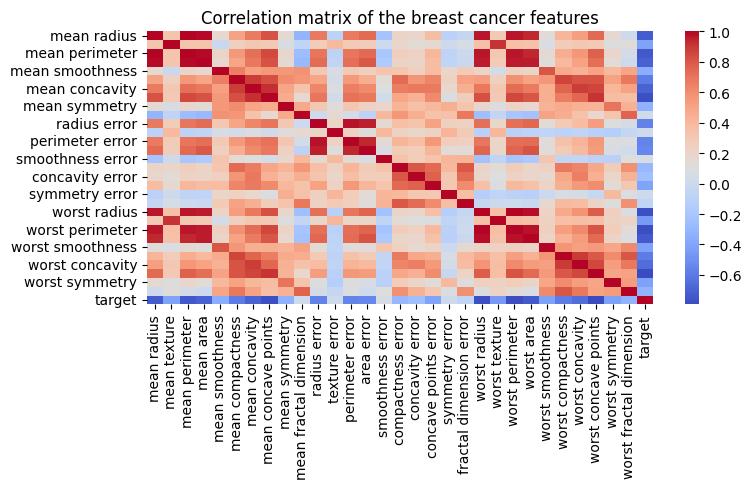

In [23]:
plt.figure(figsize=(8,5))
sns.heatmap(df_breast_cancer.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation matrix of the breast cancer features")
plt.tight_layout()
plt.show

To compare the three selected methods let's use the features radius (0) and symmetry (8) and color the correct predictions according to this scheme: lighblue for benign and plum for maligne tumours. Wrong predictions are markes with an X colored either in dark red or dark blue.

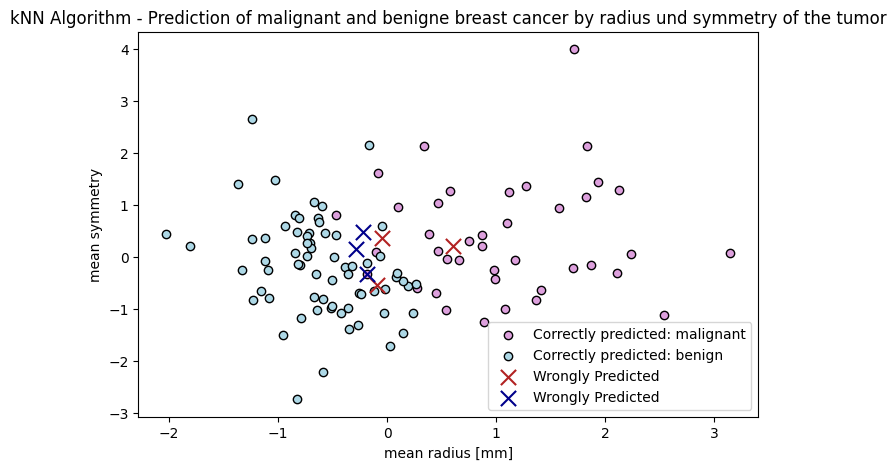

In [24]:
correct_pred_colors = ["plum", "lightblue"]
wrong_pred_colors = ["firebrick", "darkblue"]
plt.figure(figsize=(8,5))

for i,target_name in enumerate(breast_cancer.target_names):
    plt.scatter(
        X_test[(y_pred_knn==i)&(y_test==i),0], X_test[(y_pred_knn==i)&(y_test==i),8],
        edgecolor="black", facecolor= correct_pred_colors[i], label = f"Correctly predicted: {target_name}" )

for i, target_name in enumerate(breast_cancer.target_names):
    plt.scatter(
        X_test[(y_test == i) & (y_test!=y_pred_knn),0], X_test[(y_test == i)&(y_test!=y_pred_knn),8],
        color = wrong_pred_colors[i], label = "Wrongly Predicted", marker="x", s= 120)
plt.title("kNN Algorithm - Prediction of malignant and benigne breast cancer by radius und symmetry of the tumor")
plt.xlabel("mean radius [mm]")
plt.ylabel("mean symmetry")
plt.legend()
plt.show()

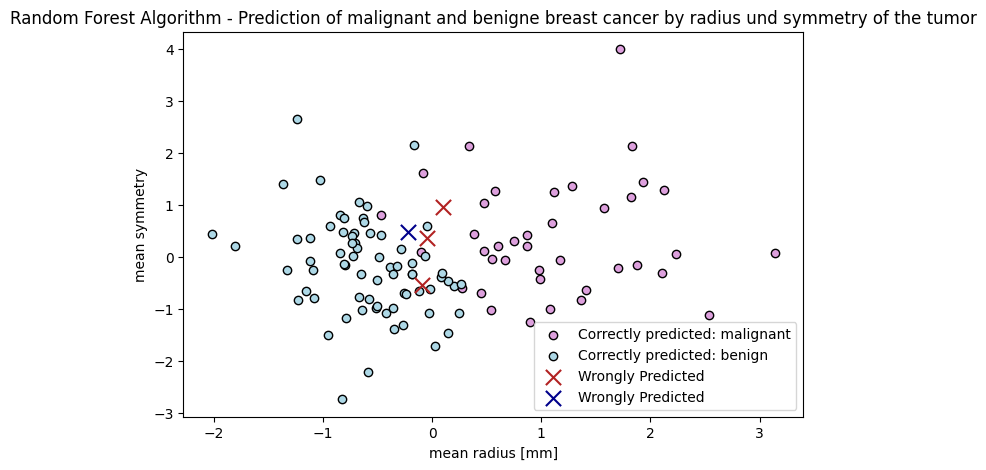

In [25]:
correct_pred_colors = ["plum", "lightblue"]
wrong_pred_colors = ["firebrick", "darkblue"]
plt.figure(figsize=(8,5))

for i,target_name in enumerate(breast_cancer.target_names):
    plt.scatter(
        X_test[(y_pred_RF==i)&(y_test==i),0], X_test[(y_pred_RF==i)&(y_test==i),8],
        edgecolor="black", facecolor= correct_pred_colors[i], label = f"Correctly predicted: {target_name}" )

for i, target_name in enumerate(breast_cancer.target_names):
    plt.scatter(
        X_test[(y_test == i) & (y_test!=y_pred_RF),0], X_test[(y_test == i)&(y_test!=y_pred_RF),8],
        color = wrong_pred_colors[i], label = "Wrongly Predicted", marker="x", s= 120)
plt.title("Random Forest Algorithm - Prediction of malignant and benigne breast cancer by radius und symmetry of the tumor")
plt.xlabel("mean radius [mm]")
plt.ylabel("mean symmetry")
plt.legend()
plt.show()

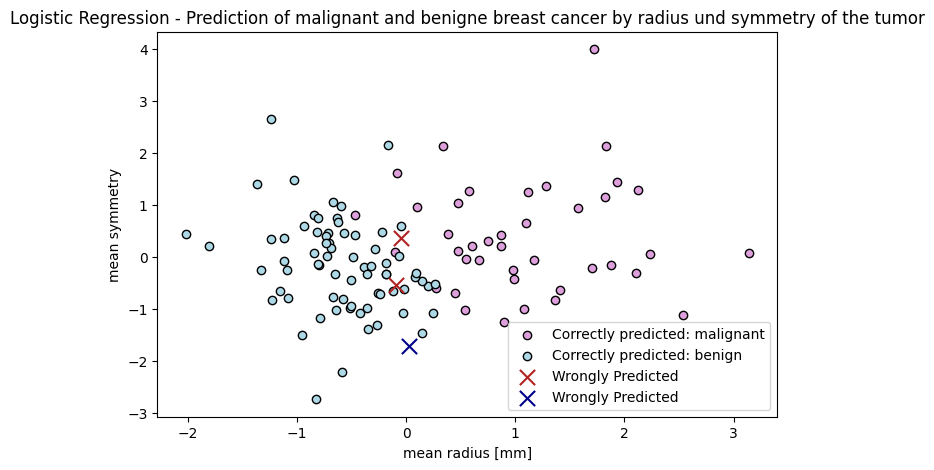

In [26]:
correct_pred_colors = ["plum", "lightblue"]
wrong_pred_colors = ["firebrick", "darkblue"]
plt.figure(figsize=(8,5))

for i,target_name in enumerate(breast_cancer.target_names):
    plt.scatter(
        X_test[(y_pred_LR==i)&(y_test==i),0], X_test[(y_pred_LR==i)&(y_test==i),8],
        edgecolor="black", facecolor= correct_pred_colors[i], label = f"Correctly predicted: {target_name}" )

for i, target_name in enumerate(breast_cancer.target_names):
    plt.scatter(
        X_test[(y_test == i) & (y_test!=y_pred_LR),0], X_test[(y_test == i)&(y_test!=y_pred_LR),8],
        color = wrong_pred_colors[i], label = "Wrongly Predicted", marker="x", s= 120)
plt.title("Logistic Regression - Prediction of malignant and benigne breast cancer by radius und symmetry of the tumor")
plt.xlabel("mean radius [mm]")
plt.ylabel("mean symmetry")
plt.legend()
plt.show()

## Conclusion

For binary datasets (malignant, benign) the algorithm logistic regression works best. Also the correlations are linear since malignant tumors are often bigger and less symmetric. The Random Forest algorithm also delivers good results. It usually deals well with non-linear correlations and more complex data. It shines with big complex data sets. kNN is a distance based algorithm and outputs less reliable results compared to the other algorithms. It works best with small well-structured data sets and is more sensitive to outliers.